In [27]:
import numpy as np
import astropy 
import h5py
from astropy.io import fits
from astrodendro import Dendrogram, pp_catalog


In [2]:
pip install astrodendro

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/python/3.7.3/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
data = fits.getdata('/home/student04/Newrepos/moment0.fits')

In [80]:
#Estimates average noise value of the M0 map
sigma = np.nanstd(data[250:270,150:180])
print(s)

0.4869277627992296


In [98]:
#Set min_value and min_delta parameters for computing dendrogram
min_value = 3*sigma
min_delta = sigma
print(min_value,min_delta)

1.4607832883976888 0.4869277627992296


In [107]:
#Compute min_npix
beam_area = 1.133*(31*u.arcsec)**2
pixel_area = 1.133*(8.8*u.arcsec)**2
min_npix = int(beam_area/pixel_area)

In [110]:
d = Dendrogram.compute(data,min_value= min_value,min_delta=min_delta,min_npix=12) 

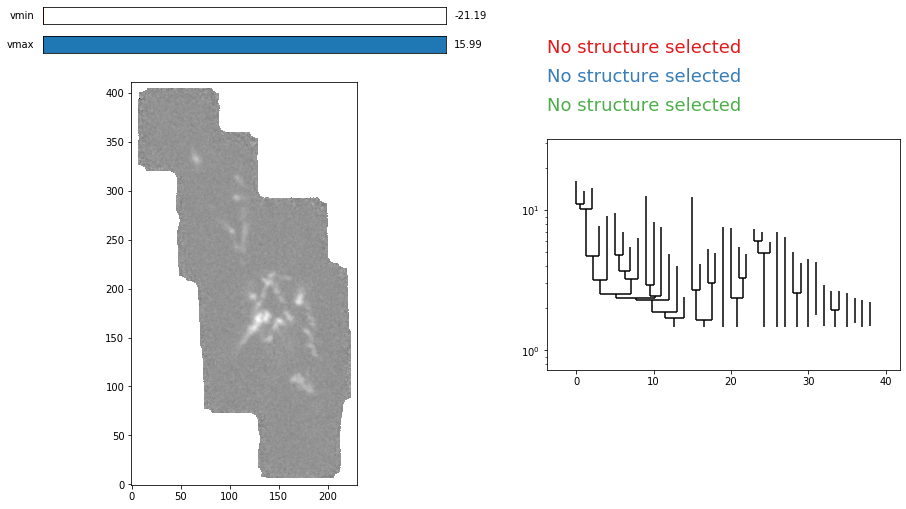

In [111]:
v = d.viewer()

In [31]:
from astrodendro.analysis import PPStatistic


In [32]:
from astropy import units as u

In [33]:
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= 8.8*u.arcsec
metadata['beam_major']=30.8*u.arcsec
metadata['beam_minor']=30.8*u.arcsec

In [34]:
cat = pp_catalog(d,metadata)
cat.pprint(show_unit=True,max_lines=10)

Computing catalog for 107 structures

[>                                        ] 0%
[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 3%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[==>                                      ] 7%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 10%
[====>                                    ] 11%
[====>                                    ] 12%
[=====>                                   ] 13%
[=====>                                   ] 14%
[=====>                                   ] 14%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 17%
[=======>                                 ] 18%
[=======>   


[============>                            ] 30%
[============>                            ] 31%
[=============>                           ] 32%
[=============>                           ] 33%
[=============>                           ] 34%
[==============>                          ] 35%
[==============>                          ] 36%
[==============>                          ] 37%
[===============>                         ] 38%
[===============>                         ] 39%
[================>                        ] 40%
[================>                        ] 41%
[================>                        ] 42%
[=================>                       ] 42%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 46%
[===================>                     ] 47%
[===================>                     ] 48%
[===================>                  

In [35]:
d1 = Dendrogram.load_from('/home/student04/Newrepos/NGC1333_dendrogram.fits')

/home/student04/.local/lib/python3.7/site-packages/astrodendro/viewer.py:95: UserWarning: `WCSAxes` package required for wcs coordinate display.
  warnings.warn("`WCSAxes` package required for wcs coordinate display.")


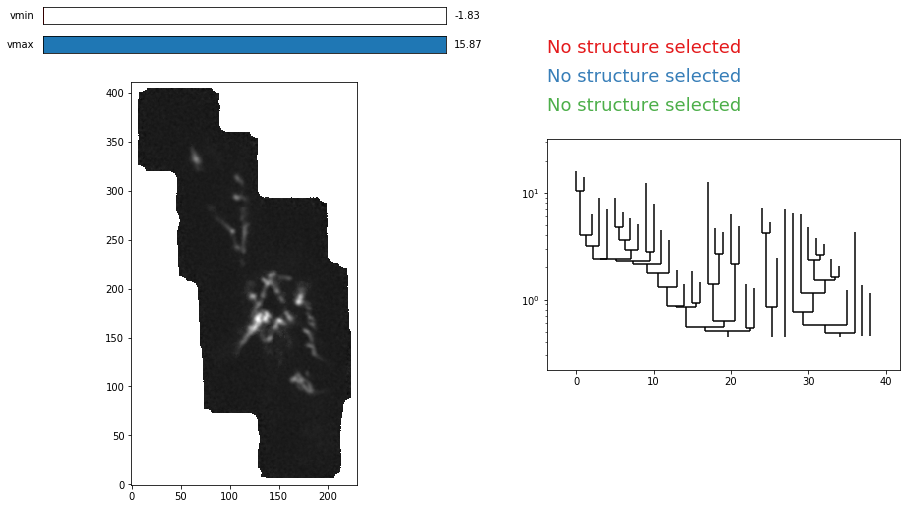

In [36]:
v1 = d1.viewer()

In [37]:
m0 = fits.open('/home/student04/Downloads/NGC1333_NH3_11_all_rebase3_mom0_QA_trim.fits')

In [38]:
m0[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  231                                                  
NAXIS2  =                  412                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                115.5 / Pixel coordinate of reference point            
CRPIX2  =                206.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0024440485689343 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0024440485689343 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

In [39]:
#Converting the spatial axis and beam size into arcsecs
spatial_axis = (0.0024440485689343*u.deg).to(u.arcsec)
bmaj = (0.008554169991270138*u.deg).to(u.arcsec)
bmin = (0.008554169991270138*u.deg).to(u.arcsec)

In [40]:
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= spatial_axis
metadata['beam_major']= bmaj
metadata['beam_minor']= bmin

In [41]:
cat1 = pp_catalog(d1,metadata)
cat1.pprint(show_unit=True,max_lines=10)

Computing catalog for 72 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[===========>                             ] 27%
[=========


[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 47%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 51%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 56%
[=======================>                 ] 58%
[=======================>                 ] 59%
[========================>                ] 61%
[========================>                ] 62%
[=========================>               ] 63%
[==========================>              ] 65%
[==========================>              ] 66%
[===========================>             ] 68%
[===========================>             ] 69%
[============================>         

# Exploring the Paramters
Plotting histograms and scatterplots for position angle, elongation, area, etc.

# Histograms

In [113]:
position_angle = np.zeros([72])
for i in range(72):
    s = d1[i]
    stat = PPStatistic(s,metadata=metadata)
    a = stat.position_angle/(1*u.deg)
    if a<0:
        position_angle[(i)]= a + 180
    else:
        position_angle[(i)]= a

Text(0.5, 1.0, 'Position Angle(deg)')

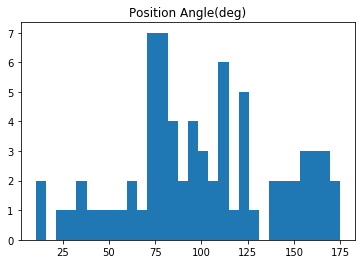

In [151]:
#Plotting histogram of position angle for all structures
from matplotlib import pyplot as plt
plt.hist(position_angle,bins=30)
plt.title('Position Angle(deg)')

median: 118.3150731739695


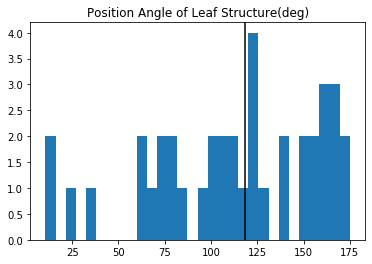

In [173]:
#plotting the histogram of position angle for only leaf structure
angle = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        a = stat.position_angle/(1*u.deg)
        if a<0:
            angle.append(a+180)
        else:
            angle.append(a)
position_angle_leaf = np.array(angle)
plt.hist(position_angle_leaf,bins=30)
plt.title('Position Angle of Leaf Structure(deg)')
P_mean = np.mean(position_angle_leaf)
P_median = np.median(position_angle_leaf)
plt.axvline(x = P_median,color='k')
print('median:',P_median)

In [117]:
elongation = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        elongation.append(stat.major_sigma/stat.minor_sigma)
elongation_leaf = np.array(elongation)

median: 1.7880570998129837


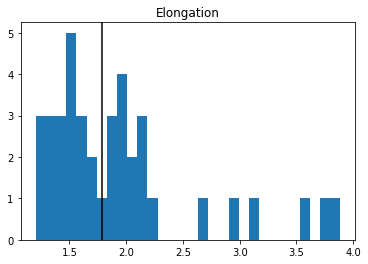

In [172]:
plt.hist(elongation_leaf,bins=30)
plt.title('Elongation')
E_median = np.median(elongation_leaf)
plt.axvline(x = E_median,color='k')
print('median:',E_median)

# Scatterplots

Text(0.5, 1.0, 'Position Angle vs Elongation')

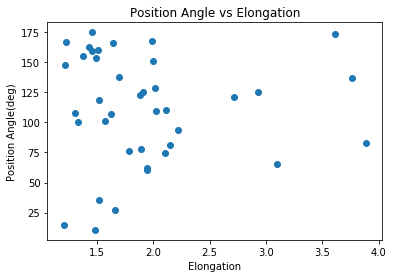

In [130]:
plt.scatter(elongation_leaf,position_angle_leaf)
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('Position Angle vs Elongation')

In [119]:
area = []
for i in range(72):
    if d1[i].is_leaf:
        s = d1[i]
        stat = PPStatistic(s,metadata=metadata)
        area.append(stat.area_exact/(u.arcsec)**2)
area_leaf = np.array(area)

Text(0.5, 1.0, 'Elongation vs Area')

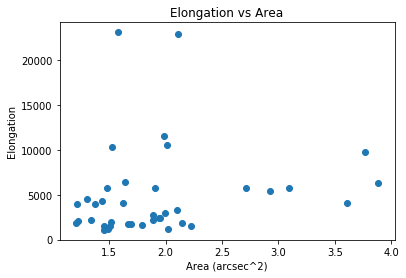

In [120]:
plt.scatter(elongation_leaf,area_leaf)
plt.xlabel('Area (arcsec^2)')
plt.ylabel('Elongation')
plt.title('Elongation vs Area')

Text(0.5, 1.0, 'Position Angle vs Area')

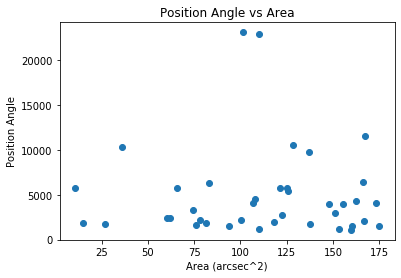

In [168]:
plt.scatter(position_angle_leaf,area_leaf)
plt.xlabel('Area (arcsec^2)')
plt.ylabel('Position Angle')
plt.title('Position Angle vs Area')

# Contour Line Map 
This map only highlights the identified "leaf structures", or cores.

In [171]:
image = fits.getdata('/home/student04/Downloads/NGC1333_NH3_11_all_rebase3_mom0_QA_trim.fits')
p = d1.plotter()

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


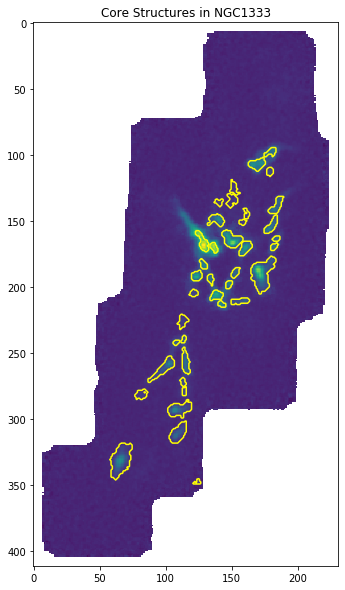

In [169]:
fig = plt.figure(figsize=(10,10))
plt.title('Core Structures in NGC1333')
ax = fig.add_subplot(1,1,1)
ax.imshow(image)
for i in range(72):
    if d1[i].is_leaf:
        p.plot_contour(ax,structure=i,colors='yellow')

# Elongation Threshold
The measurement of position angle is related to the elongation of structures.It is easier to determine the position angle for elongated structures, while more difficult for more rounded structures. Hence, an elongation threshold needs to be set as a reference value.Beyond this value, the position angles measurements become inaccurate and should be treated as outliers in the data. In this project, we adopted the threshold value from Chen et al(2020) and rejected measurements with elongtation < 1.25. 

In [147]:
new_angle = []
new_elongation = []
for i in range(39):
    if elongation_leaf[(i)]>1.25:
        new_angle.append(position_angle_leaf[(i)])
        new_elongation.append(elongation_leaf[(i)])
new_angle_leaf = np.array(new_angle)  
new_elongation_leaf = np.array(new_elongation)
print(new_angle_leaf.size,new_elongation_leaf.size) 

36 36


Text(0.5, 1.0, 'Position Angle vs Elongation')

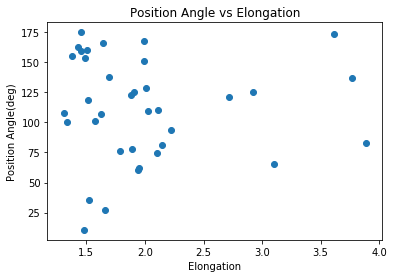

In [148]:
plt.scatter(new_elongation_leaf,new_angle_leaf)
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('Position Angle vs Elongation')